## Breeding Giant Rats Using Genetic Algorithms

In order to breed rats to the giant fucking size I want, I will first have to set a list of steps that I will follow in order to do this.

1. Establish initial population of rats and their respective weights
2. Evaluate the fitness by comparing mean population weight to a target weight
3. Keep the heaviest, natty rats
4. Have the heavy, natty rats interbreed
5. Randomly alter weights on a few rats, simulating mutation
6. Stop when the rats are as large as a mastiff

***Table 1-1: Brown Rat Weight and Breeding Stats***

| **Parameter** | **Published Values** |
| ------------- | -------------------- |
|Minimum weight | 200 grams |
| Average female weight | 250 grams |
|Average male weight | 300-350 grams |
|Maximum weight (wild, captivity) | 600 grams, 1000 grams |
|Number of pups per litter | 8-12|
|Litters per year | 4 - 13 |
|Life span (wild, captivity) | 1-3 years, 4-6 years|

***Table 1-2: Input Assumptions for the Super-Rats***

| **Variable and Value** | **Comments** |
| -- |-- |
|Goal = 50000 | Target weight in grams|
|Num_Rats = 20 | Total number of adult rats the lab can support |
|Initial_Min_Wt = 200 | Minimum weight of adult rat in initial population|
|Initial_Max_Wt = 600 | Maximum weight of adult rat in initial population|
|Initial_Mode_Wt = 300 | Most common adult rat weight in initial populaiton|
|Mutate_Odds = 0.01 | Probability of mutation occuring|
|Mutate_Min = 0.5 | Scalar on rat weight for least beneficial mutation|
|Mutate_Max = 1.2 | Scaler on rat weight for most beneficial mutation|
|Litter_Size = 8 | Number of pups per pair of mating rats|
|Litters_Per_Year = 10| Number of litter per year per pair of mating rats|
|Generation_Limit = 500| Generational cutoff to stop breeding program|

In [30]:
import time
import random
import statistics
from matplotlib import pyplot as plt

#Constants
GOAL = 50000
NUM_RATS = 20
INITIAL_MIN_WEIGHT = 200
INITIAL_MAX_WEIGHT = 600
INITIAL_MODE_WEIGHT = 300
MUTATE_ODDS = 0.01
MUTATE_MIN = 0.5
MUTATE_MAX = 1.2
LITTER_SIZE = 8
LITTERS_PER_YEAR = 10
GENERATION_LIMIT = 500

#Ensure even number of rats for breeding pairs
if NUM_RATS % 2 != 0:
    NUM_RATS += 1

In [31]:
#Defines the function that creates the initial rat population

def populate(num_rats, min_wt, max_wt, mode_wt):
    '''Initialize a population with a triangular distribution of weights.'''
    return [int(random.triangular(min_wt, max_wt, mode_wt)) for i in range(num_rats)]

#Defines a function to grade the fitness of the current generation.

def fitness(population, goal):
    '''Meaure population fitness based on an attribute mean vs. target.'''
    ave = statistics.mean(population)
    return ave / goal

#Defines a function that will cull the undesirable population of rats

def select(population, to_retain):
    '''Cull a population to retain only a specified number of members.'''
    sorted_population = sorted(population)
    to_retain_by_sex = to_retain // 2
    members_per_sex = len(sorted_population) // 2
    females = sorted_population[:members_per_sex]
    #Simplifying Assumption: the largest female rat is smaller than the smallest male rat
    males = sorted_population[members_per_sex:]
    selected_females = females[-to_retain_by_sex:]
    selected_males = males[-to_retain_by_sex:]
    return selected_males, selected_females

#Defines the function that breeds a new generation of rats

def breed(males, females, litter_size):
    '''Crossover genes among members (weights) of a population.'''
    random.shuffle(males)
    random.shuffle(females)
    children = []
    for male, female in zip(males, females):
        for child in range(litter_size):
            child = random.randint(female, male)
            children.append(child)
    return children

#Defines the function that mutates a small portion of the population

def mutate(children, mutate_odds, mutate_min, mutate_max):
    '''Randomly alter rat weight using input odds and fractional changes.'''
    for index, rat in enumerate(children):
        if mutate_odds >= random.random():
            children[index] = round(rat * random.uniform(mutate_min, mutate_max))
    return children

In [51]:
#Defines the main function

def main():
    '''Initialize population, select, breed, mutate, and display results.'''
    generations = 0
    parents = populate(NUM_RATS, INITIAL_MIN_WEIGHT, INITIAL_MAX_WEIGHT, INITIAL_MODE_WEIGHT)
    #print('Initial population weights = {}'.format(parents))
    population_fitness = fitness(parents, GOAL)
    print('Initial population fitness = {}'.format(population_fitness))
    print('number to retain = {}'.format(NUM_RATS))
    
    ave_wt = []
    pop_fit = []
    
    while population_fitness < 1 and generations < GENERATION_LIMIT:
        selected_males, selected_females = select(parents, NUM_RATS)
        children = breed(selected_males, selected_females, LITTER_SIZE)
        children = mutate(children, MUTATE_ODDS, MUTATE_MIN, MUTATE_MAX)
        parents = selected_males + selected_females + children
        population_fitness = fitness(parents, GOAL)
        #print('Generation {} fitness = {:.4f}'.format(generations, population_fitness))
        ave_wt.append(int(statistics.mean(parents)))
        pop_fit.append(population_fitness)
        generations += 1
    
    plt1 = plt.figure(1)
    x = range(len(pop_fit))
    y = pop_fit
    plt.plot(x, y)
    plt.xlabel('Number of Generation')
    plt.ylabel('Percentage to Goal')
    
    plt2 = plt.figure(2)
    x2 = range(len(ave_wt))
    y2 = ave_wt
    plt.plot(x2, y2)
    plt.xlabel('Number of Generation')
    plt.ylabel('Weight of Rat')
    plt.show()
    
    #print('average weight per generation = {}'.format(ave_wt))
    #print('\nnumber of generations = {}'.format(generations))
    print('number of years = {}'.format(int(generations / LITTERS_PER_YEAR)))
    

Initial population fitness = 0.00681
number to retain = 20


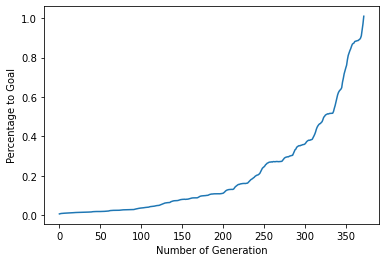

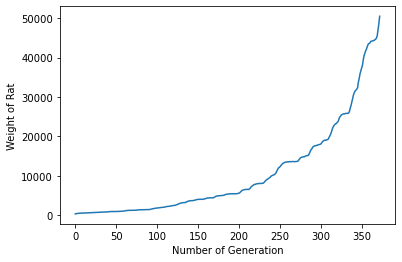

number of years = 37

Runtime for this program was 0.28366899490356445 seconds.


In [52]:
if __name__ == '__main__':
    start_time = time.time()
    main()
    end_time = time.time()
    duration = end_time - start_time
    print('\nRuntime for this program was {} seconds.'.format(duration))